<a href="https://colab.research.google.com/github/imatyushov/math-stat-hse-itmo/blob/main/lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Цели и задачи л/р: выполнить массовое статистическое моделирование, направленное на изучение статистического поведения разных доверительных интервалов для математического ожидания (параметрических и непараметрических) и для медианы.

1. Генерировать выборки разного размера из следующих распределений

1.1 Нормального закона с нулевым математическим ожиданием и произвольно заданной дисперсией

1.2 Равномерного закона на интервал [-1, 1]

1.3 Экспоненциального закона распределения с параметром, равным 1 (из всех значений выборки нужно вычесть 1, чтобы получилось нулевое математическое ожидание).

Построить доверительные интервалы для математического ожидания (асимптотический, с коэффициентом Стьюдента, Хора-Хора) по каждой из выборок.


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
sample_sizes = [10, 20, 30, 40, 50, 60];
N = 10 ** 3;
alpha = 0.05;
true_mean = 0;

In [ ]:
def generate_samples(distribution, size, n):
    if (distribution == 'normal'):
        return np.random.normal(loc=0, scale=1, size=(n, size))
    elif (distribution == 'uniform'):
        return np.random.uniform(low=-1, high=1, size=(n, size))
    elif (distribution == 'exponential'):
        return np.random.exponential(scale=1, size=(n, size)) - 1

def compute_intervals(samples):
    n, size = samples.shape
    asymptotic_intervals = []
    student_intervals = []

    for i in range(n):
        sample = samples[i]
        sample_mean = np.mean(sample)
        sample_std = np.std(sample, ddof=1)

        # Determine the z-critical value
        z_critical_value = stats.norm.ppf(1 - alpha/2)
        margin_asympt = z_critical_value * (sample_std / np.sqrt(size))
        asymptotic_intervals.append((sample_mean - margin_asympt, sample_mean + margin_asympt))

        # Determine the t-stat value
        t_student_value = stats.t.ppf(1 - alpha/2, df=size-1)
        margin_student = t_student_value * (sample_std / np.sqrt(size))
        student_intervals.append((sample_mean - margin_student, sample_mean + margin_student))

    return asymptotic_intervals, student_intervals

In [ ]:
def computeQ(intervals, true_value):
    count = sum(lower <= true_value <= upper for lower, upper in intervals)
    return count / len(intervals)

results = {'normal': [], 'uniform': [], 'exponential': []}

for distribution_type in results.keys():
    for size in sample_sizes:
        samples = generate_samples(distribution_type, size, N)
        asymptotic_intervals, student_intervals = compute_intervals(samples)

        q_star_asympt = computeQ(asymptotic_intervals, true_mean)
        q_star_student = computeQ(student_intervals, true_mean)

        results[distribution_type].append({
            'size': size,
            'q_star_asymptotic': q_star_asympt,
            'q_star_student': q_star_student,
            'asymptotic_intervals': asymptotic_intervals,
            'student_intervals': student_intervals
        })

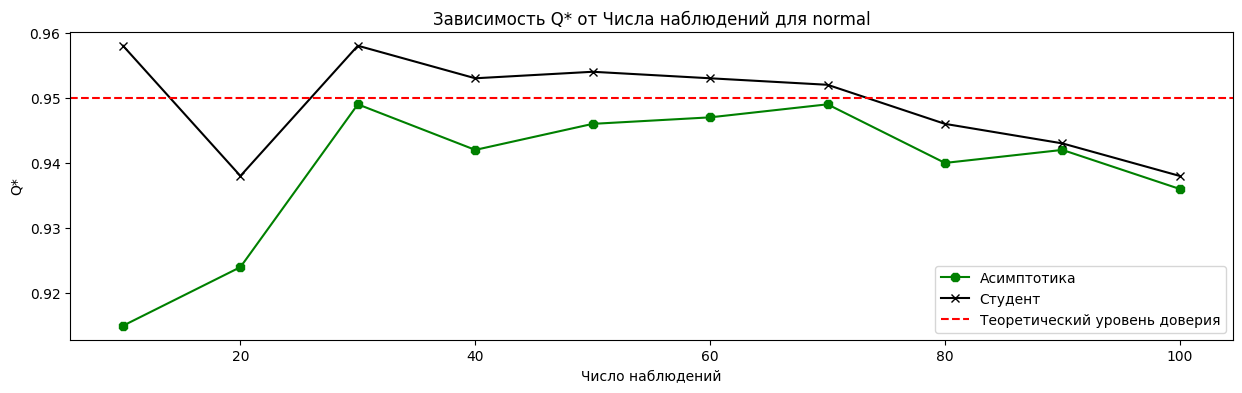

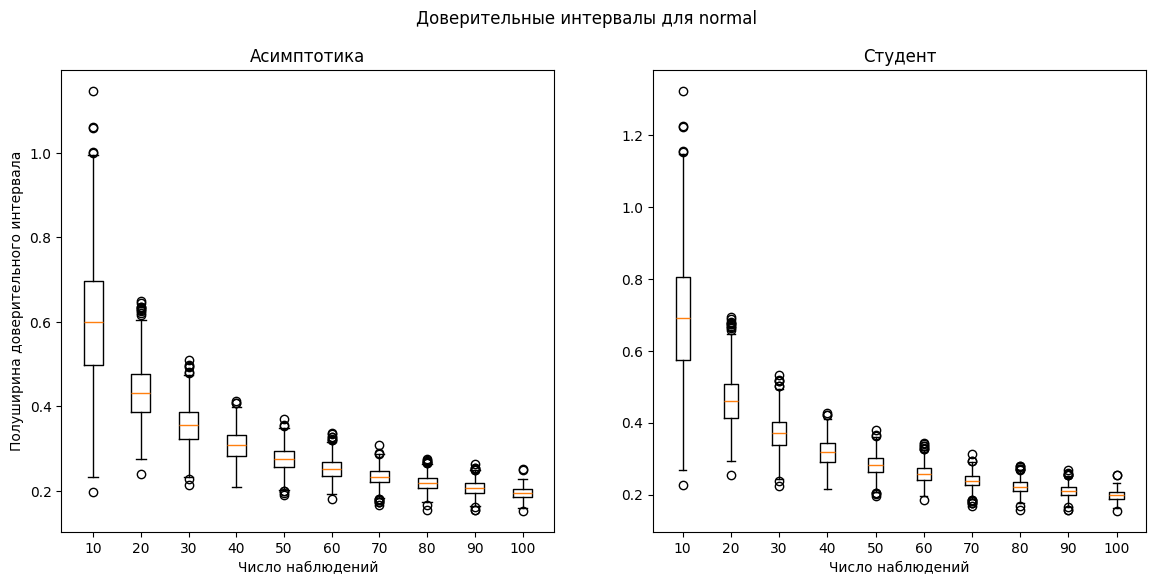

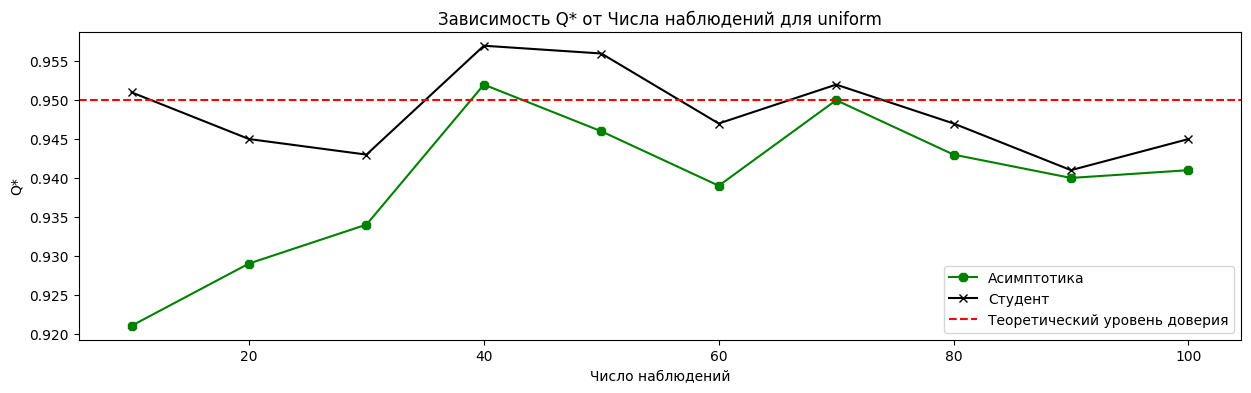

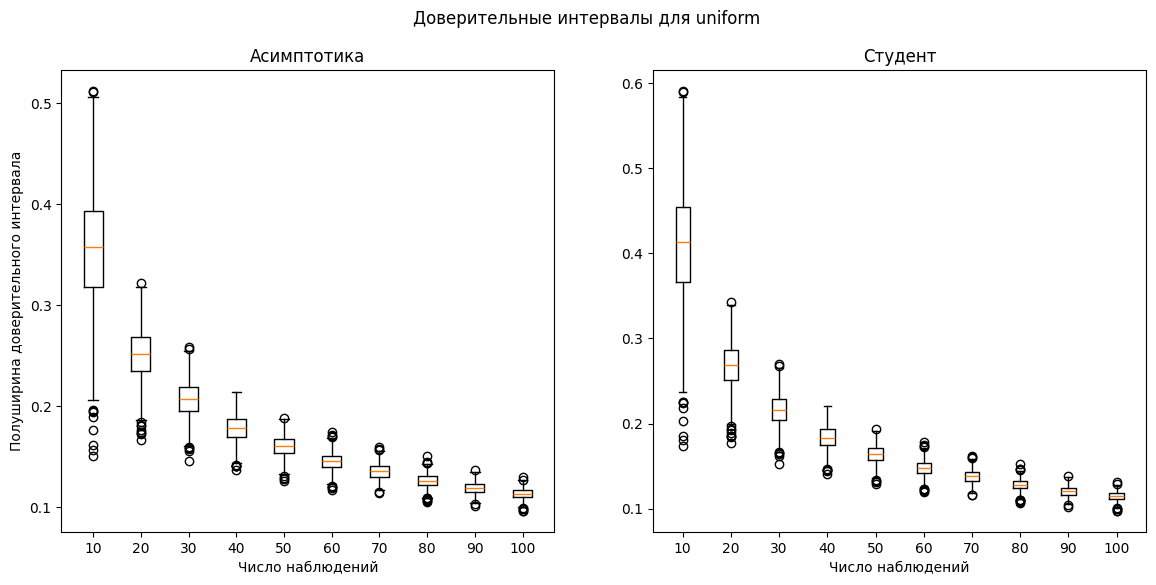

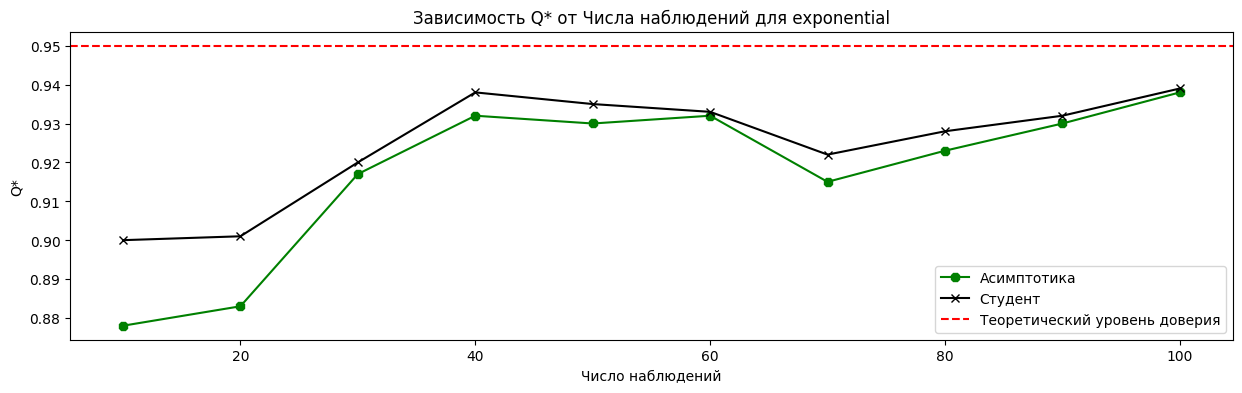

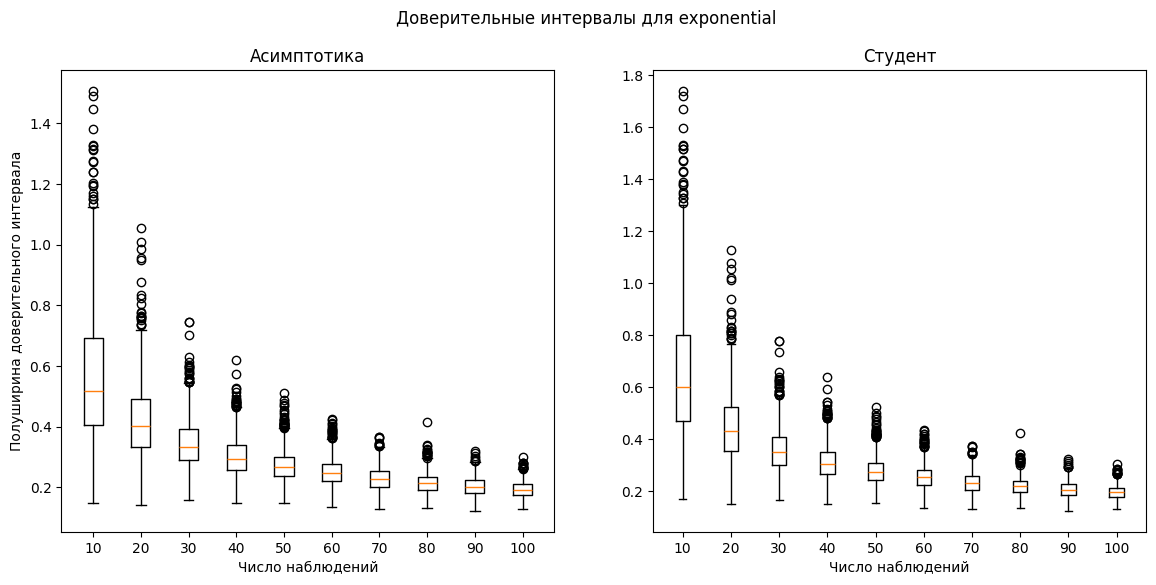

In [ ]:
for dist_type, data in results.items():
    sizes = [d['size'] for d in data]
    q_asympt = [d['q_star_asymptotic'] for d in data]
    q_student = [d['q_star_student'] for d in data]

    plt.figure(figsize=(15, 4))
    plt.plot(sizes, q_asympt, label='Асимптотика', color='green', marker='8')
    plt.plot(sizes, q_student, label='Студент', color='black', marker='x')
    plt.axhline(0.95, color='red', linestyle='--', label='Теоретический уровень доверия')
    plt.xlabel("Число наблюдений")
    plt.ylabel("Q*")
    plt.title(f"Зависимость Q* от Числа наблюдений для { dist_type }")
    plt.legend()
    plt.show()

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f"Доверительные интервалы для {dist_type}")

    asympt_data = [[(upper - lower) / 2 for lower, upper in d['asymptotic_intervals']] for d in data]
    student_data = [[(upper - lower) / 2 for lower, upper in d['student_intervals']] for d in data]

    ax[0].boxplot(asympt_data, positions=sizes, widths=4)
    ax[0].set_title("Асимптотика")
    ax[0].set_xlabel("Число наблюдений")
    ax[0].set_ylabel("Полуширина доверительного интервала")

    ax[1].boxplot(student_data, positions=sizes, widths=3)
    ax[1].set_title("Студент")
    ax[1].set_xlabel("Число наблюдений")

    plt.show()